<a href="https://colab.research.google.com/github/Aayushi1111/Bug-Severity-Classification/blob/main/Minor24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Criteria Risk Based Bug Severity Classifiaction

## Installing Libraries

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Importing dataset

In [ ]:
df = pd.read_csv('bugs.csv')
df.head()

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated,Classification,Depends on,Is Triaged,Priority,Rank,Severity
0,1669548,enhancement,"Add an API to get task IDs, durations, results...",Tree Management,Treeherder: API,nobody@mozilla.org,NEW,---,2020-12-03 11:46:29,Developer Infrastructure,NaN,No,P1,NaN,--
1,1666634,defect,OpenPGP should avoid weak crypto algorithms wh...,MailNews Core,Security: OpenPGP,nobody@mozilla.org,NEW,---,2023-03-18 07:14:11,Components,NaN,No,P1,NaN,--
2,1667950,enhancement,Create keyboard shortcuts to directly open the...,Toolkit,Printing,nobody@mozilla.org,NEW,---,2022-05-07 11:15:15,Components,1712104,No,P1,NaN,--
3,1665566,defect,firefox hangs on certain webpages,Core,Audio/Video: cubeb,kinetik@flim.org,ASSIGNED,---,2020-12-03 05:32:37,Components,NaN,No,P1,NaN,S3
4,1670290,defect,ub18-test docker image sometimes gets build wi...,Firefox Build System,Task Configuration,nobody@mozilla.org,NEW,---,2022-10-11 17:12:35,Developer Infrastructure,NaN,No,P1,NaN,S3


In [ ]:
df.shape

(868, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bug ID          868 non-null    int64  
 1   Type            868 non-null    object 
 2   Summary         868 non-null    object 
 3   Product         868 non-null    object 
 4   Component       868 non-null    object 
 5   Assignee        868 non-null    object 
 6   Status          868 non-null    object 
 7   Resolution      868 non-null    object 
 8   Updated         868 non-null    object 
 9   Classification  868 non-null    object 
 10  Depends on      153 non-null    object 
 11  Is Triaged      868 non-null    object 
 12  Priority        868 non-null    object 
 13  Rank            0 non-null      float64
 14  Severity        790 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 101.8+ KB


## Checking for Null Values



In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

Bug ID              0
Type                0
Summary             0
Product             0
Component           0
Assignee            0
Status              0
Resolution          0
Updated             0
Classification      0
Depends on        715
Is Triaged          0
Priority            0
Rank              868
Severity           78
dtype: int64


<Axes: >

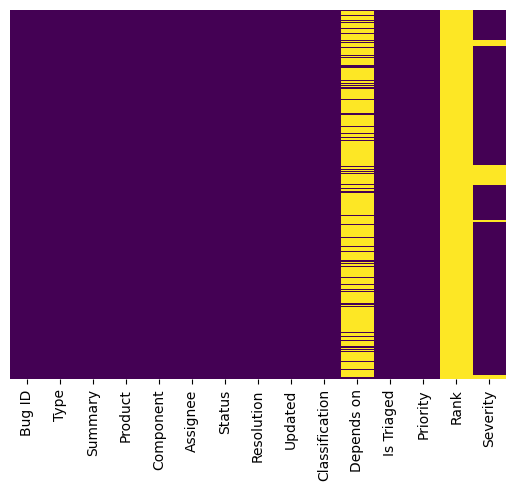

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Cleaning


In [ ]:
df = df.drop(['Depends on'], axis = 1)
#df = df.drop(['Rank'], axis = 1)
'''df = df.drop(['Bug Interest'], axis = 1)
 df = df.drop(['Rank'], axis = 1)
 df = df.drop(['Flags'], axis = 1)
 df = df.drop(['Assignee Real Name'], axis = 1)
 df = df.drop(['Resolution'], axis = 1)
 df = df.drop(['Reporter Real Name'], axis = 1)
df.head()'''

"df = df.drop(['Bug Interest'], axis = 1)\n df = df.drop(['Rank'], axis = 1)\n df = df.drop(['Flags'], axis = 1)\n df = df.drop(['Assignee Real Name'], axis = 1)\n df = df.drop(['Resolution'], axis = 1)\n df = df.drop(['Reporter Real Name'], axis = 1)\ndf.head()"

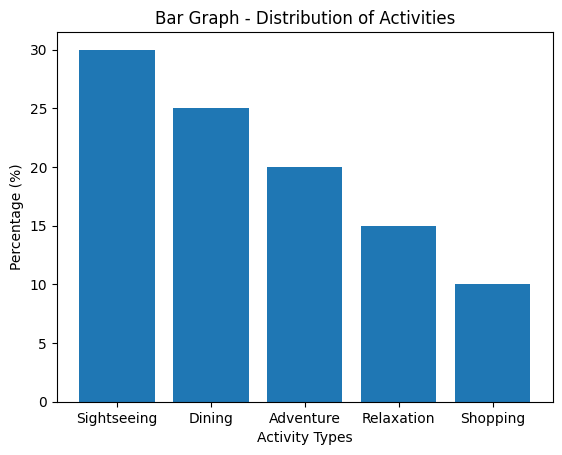

In [ ]:
import matplotlib.pyplot as plt

# Sample data
activities = ['Sightseeing', 'Dining', 'Adventure', 'Relaxation', 'Shopping']
percentages = [30, 25, 20, 15, 10]

plt.bar(activities, percentages)
plt.title('Bar Graph - Distribution of Activities')
plt.xlabel('Activity Types')
plt.ylabel('Percentage (%)')
plt.show()


<Axes: >

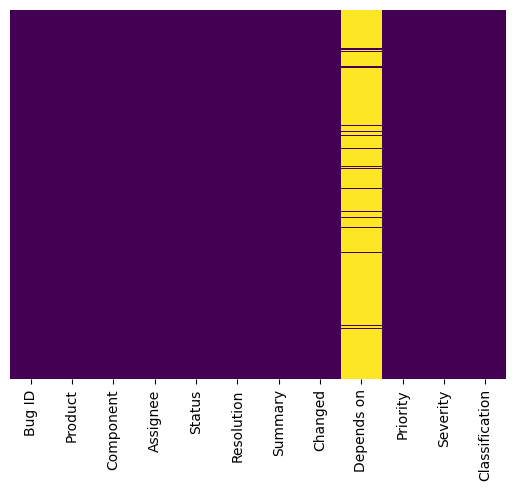

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Missing Value Treatment and Encoding

In [ ]:
df = df.dropna(subset=['Severity'])

In [ ]:
df['Severity'].unique()


array(['normal', 'critical', 'major', 'enhancement', 'blocker', 'minor',
       'trivial'], dtype=object)

In [ ]:
df['Priority'].unique()

array(['P3', 'P2', 'P1', 'P4', 'P5'], dtype=object)

In [ ]:
priority_mapping = {'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4, 'P5': 5}
severity_mapping = {'critical': 5, 'blocker': 4, 'major': 3, 'normal': 2, 'minor': 1, 'S1': 5,  'S2': 4, 'S3': 3, 'S4': 2, 'S5':1}

df['Severity'] = df['Severity'].map(severity_mapping).fillna(0)
df['Priority'] = df['Priority'].map(priority_mapping).fillna(0)

In [ ]:
df = df[df['Severity'] != 0]

In [ ]:
df['Severity'].unique()

array([2., 5., 3., 4., 1.])

In [ ]:
df = df[df['Priority'] != 0]

In [ ]:
df['Priority'].unique()

array([3, 2, 1, 4, 5])

In [ ]:
df['Component'].unique()
len(df['Component'].unique())

295

In [ ]:
unique_components = df['Component'].unique()

# Create a dictionary to map unique values to integer values
component_mapping = {component: idx + 1 for idx, component in enumerate(unique_components)}

# Map values in the 'Component' column to integer values
df['Component'] = df['Component'].map(component_mapping)
df['Component'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Data Preprocessing

In [ ]:
df['Summary']

0       Error after dragging a FB from system explorer...
1                  Properties sheet for VirtualIO element
2       SegFault may appear on Modbus Poll while termi...
3                           ECC states with the same name
4       Fdselecthandler has race condition in case of ...
                              ...                        
7871    [OI2JIRO] Migration of Viatra JIPP to new CI i...
7872    [OI2JIRO] Migration of PDT JIPP to new CI infr...
7873    ClassCastException for xerces classes causes b...
7874    [AutoRefactor immigration #71/151] [cleanup an...
7875    [Passage][Operator] Help/Licensing behaves une...
Name: Summary, Length: 6958, dtype: object

### 1. Tokenization

In [ ]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [ ]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Product,Component,Assignee,Status,Resolution,Summary,Changed,Depends on,Priority,Severity,Classification,Tokenized
0,570408,4DIAC,1,4diac-inbox,UNCONFIRMED,---,Error after dragging a FB from system explorer...,2021-01-16 04:45:59,NaN,3,2.0,IoT,"[Error, after, dragging, a, FB, from, system, ..."
1,570579,4DIAC,1,4diac-inbox,UNCONFIRMED,---,Properties sheet for VirtualIO element,2021-01-22 11:52:53,NaN,3,2.0,IoT,"[Properties, sheet, for, VirtualIO, element]"
2,571157,4DIAC,2,4diac-inbox,UNCONFIRMED,---,SegFault may appear on Modbus Poll while termi...,2021-03-24 06:32:42,NaN,3,5.0,IoT,"[SegFault, may, appear, on, Modbus, Poll, whil..."
3,572153,4DIAC,1,4diac-inbox,UNCONFIRMED,---,ECC states with the same name,2021-03-22 03:40:38,NaN,3,2.0,IoT,"[ECC, states, with, the, same, name]"
4,572264,4DIAC,2,4diac-inbox,UNCONFIRMED,---,Fdselecthandler has race condition in case of ...,2021-03-25 06:23:23,NaN,3,2.0,IoT,"[Fdselecthandler, has, race, condition, in, ca..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,571356,Community,186,zoltan.ujhelyi,CLOSED,FIXED,[OI2JIRO] Migration of Viatra JIPP to new CI i...,2021-05-04 05:13:32,NaN,3,2.0,Eclipse Foundation,"[Migration, of, Viatra, JIPP, to, new, CI, inf..."
7872,570655,Community,186,zulus,CLOSED,FIXED,[OI2JIRO] Migration of PDT JIPP to new CI infr...,2021-03-12 10:23:39,NaN,3,2.0,Eclipse Foundation,"[Migration, of, PDT, JIPP, to, new, CI, infras..."
7873,575868,Sphinx,4,balazs.grill,CLOSED,FIXED,ClassCastException for xerces classes causes b...,2021-11-05 09:36:22,NaN,4,5.0,Automotive,"[ClassCastException, for, xerces, classes, cau..."
7874,575127,JDT,39,jjohnstn,CLOSED,WONTFIX,[AutoRefactor immigration #71/151] [cleanup an...,2023-07-20 15:32:20,572574,4,1.0,Eclipse Project,"[AutoRefactor, immigration, cleanup, and, save..."


In [ ]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0       error after dragging a fb from system explorer...
1                  properties sheet for virtualio element
2       segfault may appear on modbus poll while termi...
3                           ecc states with the same name
4       fdselecthandler has race condition in case of ...
                              ...                        
7871    migration of viatra jipp to new ci infrastructure
7872       migration of pdt jipp to new ci infrastructure
7873    classcastexception for xerces classes causes b...
7874    autorefactor immigration cleanup and save acti...
7875                passage operator behaves unexpectedly
Name: String_Tokenized, Length: 6958, dtype: object

### 2. StopWord Removal

In [ ]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0       error dragging fb system explorer typed subapp...
1                      properties sheet virtualio element
2            segfault may appear modbus poll terminate fb
3                                         ecc states name
4       fdselecthandler race condition case changing c...
                              ...                        
7871          migration viatra jipp new ci infrastructure
7872             migration pdt jipp new ci infrastructure
7873    classcastexception xerces classes causes bug l...
7874    autorefactor immigration cleanup save action r...
7875                passage operator behaves unexpectedly
Name: String_Tokenized, Length: 6958, dtype: object

In [ ]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0       error dragging fb system explorer typed subapp...
1                      properties sheet virtualio element
2            segfault may appear modbus poll terminate fb
3                                         ecc states name
4       fdselecthandler race condition case changing c...
                              ...                        
7871          migration viatra jipp new ci infrastructure
7872             migration pdt jipp new ci infrastructure
7873    classcastexception xerces classes causes bug l...
7874    autorefactor immigration cleanup save action r...
7875                passage operator behaves unexpectedly
Name: Summary_wo_Punctuation, Length: 6958, dtype: object

### 3. Stemming

In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df.head()

,Bug ID,Product,Component,Assignee,Status,Resolution,Summary,Changed,Depends on,Priority,Severity,Classification,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,570408,4DIAC,1,4diac-inbox,UNCONFIRMED,---,Error after dragging a FB from system explorer...,2021-01-16 04:45:59,NaN,3,2.0,IoT,"[Error, after, dragging, a, FB, from, system, ...",error dragging fb system explorer typed subapp...,"[error, dragging, fb, system, explorer, typed,...","[error, drag, fb, system, explor, type, subapp...",error drag fb system explor type subapp editor
1,570579,4DIAC,1,4diac-inbox,UNCONFIRMED,---,Properties sheet for VirtualIO element,2021-01-22 11:52:53,NaN,3,2.0,IoT,"[Properties, sheet, for, VirtualIO, element]",properties sheet virtualio element,"[properties, sheet, virtualio, element]","[properti, sheet, virtualio, element]",properti sheet virtualio element
2,571157,4DIAC,2,4diac-inbox,UNCONFIRMED,---,SegFault may appear on Modbus Poll while termi...,2021-03-24 06:32:42,NaN,3,5.0,IoT,"[SegFault, may, appear, on, Modbus, Poll, whil...",segfault may appear modbus poll terminate fb,"[segfault, may, appear, modbus, poll, terminat...","[segfault, may, appear, modbus, poll, termin, fb]",segfault may appear modbus poll termin fb
3,572153,4DIAC,1,4diac-inbox,UNCONFIRMED,---,ECC states with the same name,2021-03-22 03:40:38,NaN,3,2.0,IoT,"[ECC, states, with, the, same, name]",ecc states name,"[ecc, states, name]","[ecc, state, name]",ecc state name
4,572264,4DIAC,2,4diac-inbox,UNCONFIRMED,---,Fdselecthandler has race condition in case of ...,2021-03-25 06:23:23,NaN,3,2.0,IoT,"[Fdselecthandler, has, race, condition, in, ca...",fdselecthandler race condition case changing c...,"[fdselecthandler, race, condition, case, chang...","[fdselecthandl, race, condit, case, chang, cal...",fdselecthandl race condit case chang callback ...


### 4. TF-IDF

In [ ]:
data = []
for i in df['ListString']:
    review = ''.join(i)
    data.append(review)
print(data)

['error drag fb system explor type subapp editor', 'properti sheet virtualio element', 'segfault may appear modbus poll termin fb', 'ecc state name', 'fdselecthandl race condit case chang callback list', 'nonexpect diagram udp multicast group make subsrib fb pars diagram', 'listen ip specifi', 'dirti fb close without save file get chang local disk', 'error handl deploy', 'eventlist exteventlist full larg volum data', 'escap doubl quot wstring escap singl quot string', 'list http layer maintain error tcp connect', 'npe copi subapp cfbs', 'document date eclips acceleo', 'exampl miss eclips acceleo', 'user interfac tree workflow', 'boundari samplingtyp default case undefin', 'relativeperiodicstimulus need valid lowerbound', 'gradl add modul depend modul path', 'export', 'egerrit compat latest jgit eclips', 'unabl add jboss wildfli server', 'gendoc report error run eclips', 'migrat jakarta', 'unhandl event loop except glassfish tool', 'test demo', 'radio print dialog rais except activ', 'c

In [ ]:
tfidf = TfidfVectorizer()

result = tfidf.fit_transform(data)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aa : 8.749178776176741
aasx : 8.749178776176741
abap : 9.154643884284905
abil : 8.238353152410749
abl : 7.014577720788634
abnorm : 8.749178776176741
abort : 7.768349523165014
aboutact : 9.154643884284905
absolut : 9.154643884284905
abstract : 8.056031595616794
abstractcellcursor : 9.154643884284905
abstracteditortest : 8.749178776176741
abstractexternalcontrolexecutionengin : 9.154643884284905
abstractmarkerannotationmodel : 9.154643884284905
abstractprefer : 9.154643884284905
abstractrepositorymanag : 9.154643884284905
abstracttexteditor : 8.46149670372496
abstracttmftraceadapterfactori : 9.154643884284905
abstractuiplugin : 9.154643884284905
abus : 9.154643884284905
acceleo : 8.238353152410749
accent : 9.154643884284905
accept : 7.282841707383313
access : 5.052000519248109
accessdeniedexcept : 9.154643884284905
accessibleobject : 9.154643884284905
accessor : 7.545205971850804
accessorclasscr : 9.154643884284905
accessutil : 9.154643884284905
accident : 8.46149670372496
a

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'error': 1195, 'drag': 1017, 'fb': 1300, 'system': 3569, 'explor': 1264, 'type': 3774, 'subapp': 3481, 'editor': 1100, 'properti': 2822, 'sheet': 3269, 'virtualio': 3948, 'element': 1121, 'segfault': 3210, 'may': 2210, 'appear': 154, 'modbus': 2308, 'poll': 2730, 'termin': 3619, 'ecc': 1070, 'state': 3423, 'name': 2375, 'fdselecthandl': 1308, 'race': 2883, 'condit': 680, 'case': 468, 'chang': 502, 'callback': 440, 'list': 2081, 'nonexpect': 2432, 'diagram': 923, 'udp': 3788, 'multicast': 2360, 'group': 1552, 'make': 2159, 'subsrib': 3498, 'pars': 2635, 'listen': 2082, 'ip': 1826, 'specifi': 3375, 'dirti': 946, 'close': 583, 'without': 4026, 'save': 3159, 'file': 1325, 'get': 1472, 'local': 2090, 'disk': 962, 'handl': 1574, 'deploy': 887, 'eventlist': 1218, 'exteventlist': 1275, 'full': 1430, 'larg': 2006, 'volum': 3955, 'data': 810, 'escap': 1202, 'doubl': 1009, 'quot': 2876, 'wstring': 4061, 'singl': 3307, 'string': 3456, 'http': 1647, 'layer': 2024, 'maintain': 2156, 

In [ ]:
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 1100)	0.292745627572718
  (0, 3481)	0.3822806853535309
  (0, 3774)	0.2761846875983158
  (0, 1264)	0.37624512319459696
  (0, 3569)	0.35882237828767793
  (0, 1300)	0.40276366301378785
  (0, 1017)	0.45019185588334415
  (0, 1195)	0.23807210303434218
  (1, 1121)	0.42242119489776636
  (1, 3948)	0.6401313199024985
  (1, 3269)	0.5209281416926788
  (1, 2822)	0.37473470425574523
  (2, 3619)	0.31400513318002615
  (2, 2730)	0.43856444793579014
  (2, 2308)	0.43856444793579014
  (2, 154)	0.346039882577978
  (2, 2210)	0.33228336361688915
  (2, 3210)	0.4241439940265179
  (2, 1300)	0.3266026096194638
  (3, 2375)	0.43724774490685764
  (3, 3423)	0.5802662394687844
  (3, 1070)	0.6870993384559636
  (4, 2081)	0.30489577146694397
  (4, 440)	0.43641192373303367
  (4, 502)	0.2543107633704626
  :	:
  (6953, 2260)	0.365099003132492
  (6954, 1752)	0.42053366168610484
  (6954, 540)	0.3942755170480156
  (6954, 1911)	0.3421040544811111
  (6954, 2668)	0.5578728673817357
  (6954, 2407)	0.310487220

In [ ]:
print('\ntf-idf values in matrix form:')
tfIdf_mat = result.toarray()
print(tfIdf_mat)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
words_set = tfidf.get_feature_names_out()

print(words_set)

['aa' 'aasx' 'abap' ... 'のエラーメッセージが出てデバッグ出来ません' 'プログラムをデバッグしたらdelay'
 '插件问题']


In [ ]:
df_tf_idf = pd.DataFrame(tfIdf_mat, columns = words_set)

df_tf_idf

,aa,aasx,abap,abil,abl,abnorm,abort,aboutact,absolut,abstract,...,zzz,для,доделать,загрузки,надо,поиск,фактур,のエラーメッセージが出てデバッグ出来ません,プログラムをデバッグしたらdelay,插件问题
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

# Replace "--" with NaN
df_tf_idf.replace("--", np.nan, inplace=True)

# Drop rows with NaN values
df_tf_idf.dropna(inplace=True)

# Now, "--" should be removed from your DataFrame

## Feature Extraction


In [ ]:
df['Risk'] = df['Severity'] * df['Priority']
df['Risk']

0        6.0
1        6.0
2       15.0
3        6.0
4        6.0
        ... 
7871     6.0
7872     6.0
7873    20.0
7874     4.0
7875     5.0
Name: Risk, Length: 6958, dtype: float64

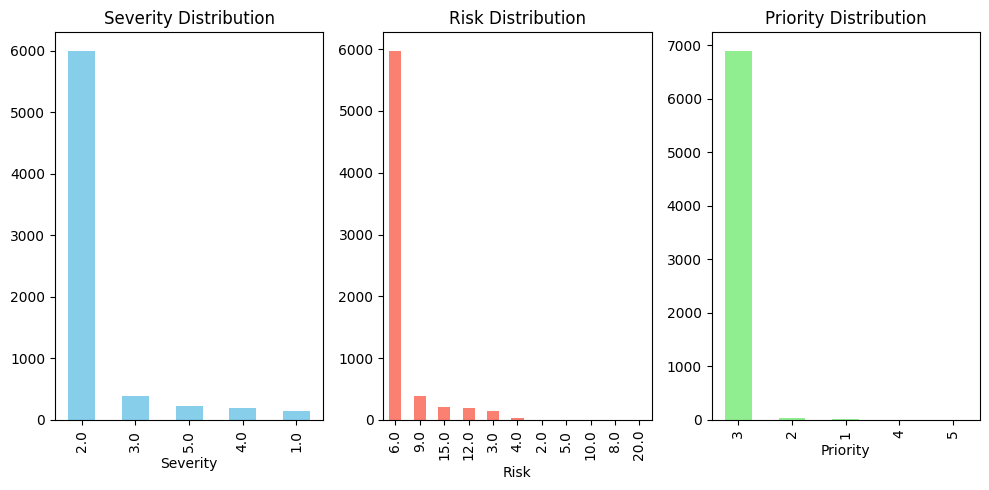

In [ ]:
import matplotlib.pyplot as plt

# Visualize distribution of Severity
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
df['Severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Severity Distribution')

# Visualize distribution of Risk
plt.subplot(1, 3, 2)
df['Risk'].value_counts().plot(kind='bar', color='salmon')
plt.title('Risk Distribution')

# Visualize distribution of Priority
plt.subplot(1, 3, 3)
df['Priority'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Priority Distribution')

plt.tight_layout()
plt.show()



## Choosing the value of K

In [ ]:
# Count the occurrences of each unique risk value
bugs_count_by_risk = df['Risk'].value_counts()

# Print the count of bugs for each risk
for risk, bugs_count in bugs_count_by_risk.items():
    print("Risk {}: {} bugs".format(risk, bugs_count))

Risk 6.0: 5974 bugs
Risk 9.0: 381 bugs
Risk 15.0: 215 bugs
Risk 12.0: 191 bugs
Risk 3.0: 145 bugs
Risk 4.0: 35 bugs
Risk 2.0: 6 bugs
Risk 5.0: 6 bugs
Risk 10.0: 2 bugs
Risk 8.0: 2 bugs
Risk 20.0: 1 bugs


In [ ]:
# Define how many times to duplicate rows with risk value 4
num_duplicates = 20

# Loop through the DataFrame and duplicate rows with risk value 4
for index, row in df.iterrows():
    if row['Risk'] == 3.0 :
        duplicated_rows = pd.DataFrame([row] * num_duplicates)
        df = pd.concat([df, duplicated_rows], ignore_index=True)

In [ ]:
# Count the occurrences of each unique risk value
bugs_count_by_risk = df['Risk'].value_counts()

# Print the count of bugs for each risk
for risk, bugs_count in bugs_count_by_risk.items():
    print("Risk {}: {} bugs".format(risk, bugs_count))

Risk 6.0: 5974 bugs
Risk 12.0: 4011 bugs
Risk 3.0: 3045 bugs
Risk 4.0: 385 bugs
Risk 9.0: 381 bugs
Risk 15.0: 215 bugs
Risk 2.0: 126 bugs
Risk 5.0: 126 bugs
Risk 8.0: 22 bugs
Risk 10.0: 2 bugs
Risk 20.0: 1 bugs


### Elbow method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

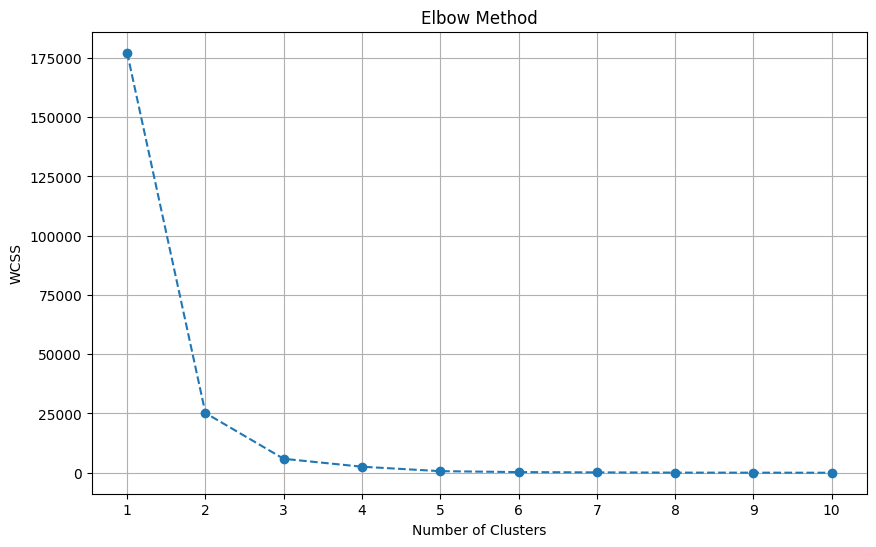

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Assuming 'Risk' is the column you want to analyze
risk_data = df['Risk'].values.reshape(-1, 1)  # Reshape data for clustering

# Find optimal number of clusters using elbow method
wcss = []  # Within-cluster sum of squares
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(risk_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, max_clusters + 1))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


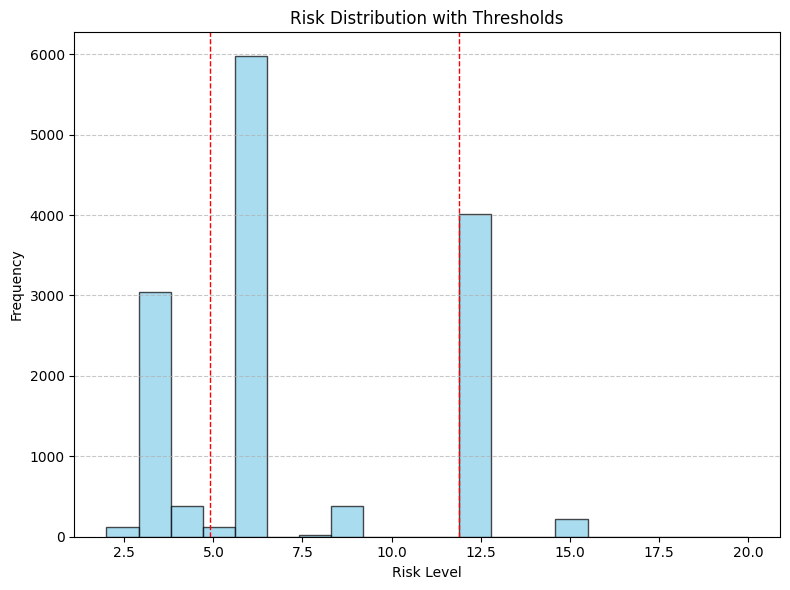

Thresholds for dividing risk into low, medium, and high classes:
Threshold 1: 4.91599504029748
Threshold 2: 11.892841648589915


In [ ]:
# From the elbow curve, determine the optimal number of clusters
optimal_num_clusters = 2 # Adjust this based on the elbow curve

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(risk_data)

# Get cluster centers (thresholds)
thresholds = kmeans.cluster_centers_.flatten()
thresholds.sort()

# Plot the distribution of Risk values with thresholds
plt.figure(figsize=(8, 6))
plt.hist(risk_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
for threshold in thresholds:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=1)
plt.title('Risk Distribution with Thresholds')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the thresholds
print("Thresholds for dividing risk into low, medium, and high classes:")
for i, threshold in enumerate(thresholds):
    print(f"Threshold {i + 1}: {threshold}")

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to normalize
# Replace 'column_name' with the actual name of your column

def normalize_column(df, Risk):
    # Copy the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Calculate the minimum and maximum values of the column
    min_val = df_normalized[Risk].min()
    max_val = df_normalized[Risk].max()

    # Apply Min-Max scaling to the column
    df_normalized[Risk] = (df_normalized[Risk] - min_val) / (max_val - min_val)

    return df_normalized

# Example usage:
df_normalized = normalize_column(df, 'Risk')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


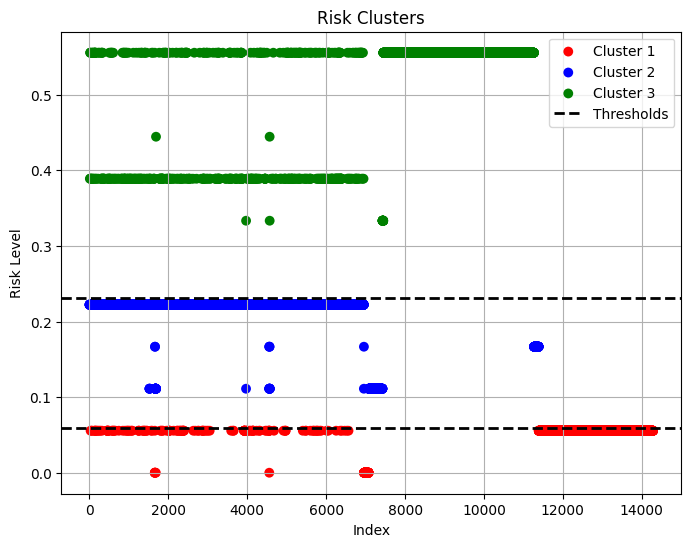

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'Risk' is the column you want to analyze
risk_data = df_normalized['Risk'].values.reshape(-1, 1)  # Reshape data for clustering

# Calculate silhouette score for different number of clusters
n_clusters = 3  # Set the number of clusters based on silhouette analysis or your choice
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(risk_data)

# Get cluster centers (thresholds)
thresholds = kmeans.cluster_centers_.flatten()
thresholds.sort()

# Define the upper and lower bounds for each cluster
cluster_bounds = [(thresholds[i], thresholds[i+1]) for i in range(n_clusters-1)]
cluster_bounds.insert(0, (-np.inf, thresholds[0]))
cluster_bounds.append((thresholds[-1], np.inf))

# Visualize clusters
plt.figure(figsize=(8, 6))

# Define color map for clusters
colors = ['red', 'blue', 'green']

# Plot points within the threshold regions
for i in range(n_clusters):
    cluster_data = df_normalized[(df_normalized['Risk'] >= cluster_bounds[i][0]) & (df_normalized['Risk'] <= cluster_bounds[i][1])]
    plt.scatter(cluster_data.index, cluster_data['Risk'], c=colors[i], label=f'Cluster {i+1}', edgecolor='none', s=50)

# Plot cluster thresholds with thicker lines
plt.axhline(y=thresholds[0], color='black', linestyle='--', linewidth=2, label='Thresholds')
plt.axhline(y=thresholds[1], color='black', linestyle='--', linewidth=2)


# Set labels and title
plt.title('Risk Clusters')
plt.xlabel('Index')
plt.ylabel('Risk Level')
plt.grid(True)
plt.legend()
plt.show()


Number of bugs in high risk region: 4632
Number of bugs in medium risk region: 6485
Number of bugs in low risk region: 3171


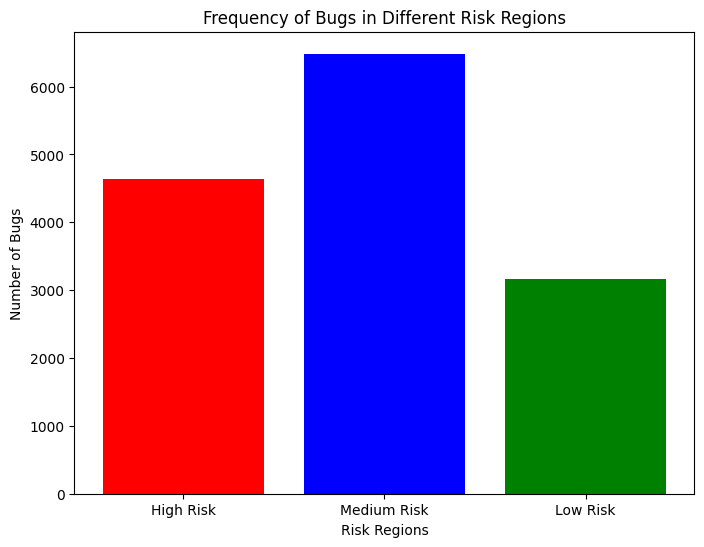

In [ ]:
# Count the number of bugs in each region
high_risk_count = len(df_normalized[df_normalized['Risk'] > thresholds[1]])
medium_risk_count = len(df_normalized[(df_normalized['Risk'] > thresholds[0]) & (df_normalized['Risk'] <= thresholds[1])])
low_risk_count = len(df_normalized[df_normalized['Risk'] <= thresholds[0]])

# Print the counts
print("Number of bugs in high risk region:", high_risk_count)
print("Number of bugs in medium risk region:", medium_risk_count)
print("Number of bugs in low risk region:", low_risk_count)

# Create a bar plot
regions = ['High Risk', 'Medium Risk', 'Low Risk']
bug_counts = [high_risk_count, medium_risk_count, low_risk_count]

plt.figure(figsize=(8, 6))
plt.bar(regions, bug_counts, color=['red', 'blue', 'green'])
plt.title('Frequency of Bugs in Different Risk Regions')
plt.xlabel('Risk Regions')
plt.ylabel('Number of Bugs')
plt.show()


##Creating New Dataframe

In [ ]:
# Copy the DataFrame to preserve the original
dataset = df_tf_idf.copy()

# Reset the indices of both DataFrames
df.reset_index(drop=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)

# Define the columns to add
#severity_column = df['Severity']
priority_column = df['Priority']
risk_column = df['Risk']

# Concatenate the columns to the end of the dataset
dataset = pd.concat([dataset, priority_column , risk_column], axis=1)


In [ ]:
df['Risk'].unique()

array([ 6., 15.,  9., 12.,  3.,  4.,  2.,  5., 10.,  8., 20.])

In [ ]:
dataset.head()

,aa,aasx,abap,abil,abl,abnorm,abort,aboutact,absolut,abstract,...,доделать,загрузки,надо,поиск,фактур,のエラーメッセージが出てデバッグ出来ません,プログラムをデバッグしたらdelay,插件问题,Priority,Risk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,15.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0


In [ ]:
# Check the data types of the 'Risk' column in both DataFrames
print(df['Risk'].dtype)
print(dataset['Risk'].dtype)

# Check for NaN values in 'Risk' column of df
print(df['Risk'].isna().sum())

# Check for NaN values in 'Risk' column of dataset
print(dataset['Risk'].isna().sum())


float64
float64
0
0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14288 entries, 0 to 14287
Columns: 4124 entries, aa to Risk
dtypes: float64(4123), int64(1)
memory usage: 449.6 MB


In [ ]:
dataset.shape

(14288, 4124)

In [ ]:
dataset.head()

,aa,aasx,abap,abil,abl,abnorm,abort,aboutact,absolut,abstract,...,доделать,загрузки,надо,поиск,фактур,のエラーメッセージが出てデバッグ出来ません,プログラムをデバッグしたらdelay,插件问题,Priority,Risk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,15.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.0


In [ ]:
dataset=dataset.head(1500)

In [ ]:
# Count the occurrences of each unique risk value
bugs_count_by_risk = dataset['Risk'].value_counts()

# Print the count of bugs for each risk
for risk, bugs_count in bugs_count_by_risk.items():
    print("Risk {}: {} bugs".format(risk, bugs_count))

Risk 6.0: 1249 bugs
Risk 9.0: 97 bugs
Risk 15.0: 62 bugs
Risk 3.0: 47 bugs
Risk 12.0: 45 bugs


## Applying ACO

### ACO + KNN for Feature Selection

Iteration 1/20: Best Accuracy = 0.8584770114942529
Iteration 2/20: Best Accuracy = 0.8584770114942529
Iteration 3/20: Best Accuracy = 0.8584770114942529
Iteration 4/20: Best Accuracy = 0.8584770114942529
Iteration 5/20: Best Accuracy = 0.8584770114942529
Iteration 6/20: Best Accuracy = 0.8584770114942529
Iteration 7/20: Best Accuracy = 0.8584770114942529
Iteration 8/20: Best Accuracy = 0.8584770114942529
Iteration 9/20: Best Accuracy = 0.8584770114942529
Iteration 10/20: Best Accuracy = 0.8584770114942529
Iteration 11/20: Best Accuracy = 0.8584770114942529
Iteration 12/20: Best Accuracy = 0.8584770114942529
Iteration 13/20: Best Accuracy = 0.8584770114942529
Iteration 14/20: Best Accuracy = 0.8584770114942529
Iteration 15/20: Best Accuracy = 0.8584770114942529
Iteration 16/20: Best Accuracy = 0.8584770114942529
Iteration 17/20: Best Accuracy = 0.8584770114942529
Iteration 18/20: Best Accuracy = 0.8584770114942529
Iteration 19/20: Best Accuracy = 0.8584770114942529
Iteration 20/20: Best

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy after ACO feature selection with KNN classifier: 0.8584770114942529
Classification Report:
               precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        29
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         1
         6.0       0.86      1.00      0.92      1195
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00        76
        10.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00        38
        15.0       0.00      0.00      0.00        43

    accuracy                           0.86      1392
   macro avg       0.09      0.10      0.09      1392
weighted avg       0.74      0.86      0.79      1392



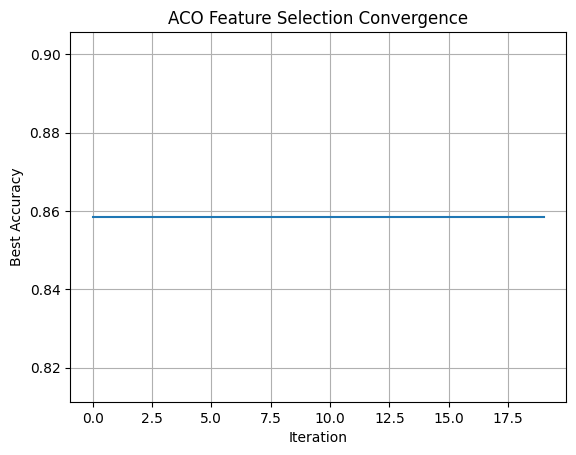

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score

def compute_heuristic_values(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain)

def initialize_pheromone_matrix(num_features, tau0):
    return np.ones((num_features,), dtype=float) * tau0

def update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho):
    delta_tau = np.dot(ant_features.T, ant_accuracies) / num_valid
    return (1 - rho) * tau + delta_tau

def select_features(probabilities, remaining_features, q0):
    if np.random.rand() < q0:
        return np.argmax(probabilities)
    else:
        selected_feature = np.random.choice(remaining_features, p=probabilities)
        return selected_feature

def aco_feature_selection(xtrain, ytrain, xvalid, yvalid, opts, heuristic_values):
    num_ants = opts['num_ants']
    max_iter = opts['max_iter']
    alpha = opts['alpha']
    beta = opts['beta']
    rho = opts['rho']
    q0 = opts['q0']
    tau0 = opts['tau0']

    num_features = xtrain.shape[1]
    num_valid = len(yvalid)
    tau = initialize_pheromone_matrix(num_features, tau0)
    best_features = np.zeros((num_features,), dtype=int)
    best_accuracy = 0.0
    history = np.zeros((max_iter,), dtype=float)

    for iteration in range(max_iter):
        ant_accuracies = []
        ant_features = np.zeros((num_ants, num_features), dtype=int)

        for ant in range(num_ants):
            ant_solution = np.zeros((num_features,), dtype=int)
            remaining_features = np.arange(num_features)

            selected_indices = np.random.choice(remaining_features, size=opts['k'], replace=False)
            ant_solution[selected_indices] = 1

            x_train_subset = xtrain[:, selected_indices]
            x_valid_subset = xvalid[:, selected_indices]

            mdl = KNeighborsClassifier(n_neighbors=opts['k'])
            mdl.fit(x_train_subset, ytrain)
            y_pred = mdl.predict(x_valid_subset)
            accuracy = accuracy_score(yvalid, y_pred)
            ant_accuracies.append(accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = ant_solution

        tau = update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho)
        history[iteration] = best_accuracy
        print(f"Iteration {iteration + 1}/{max_iter}: Best Accuracy = {best_accuracy}")

    return best_features, history

# Load data
data = dataset.values
feat = data[:, :-1]
label = data[:, -1]

# Find classes with only one member
unique_classes, class_counts = np.unique(label, return_counts=True)
classes_with_one_member = unique_classes[class_counts == 1]

# Remove samples from classes with only one member
for class_label in classes_with_one_member:
    label_indices = np.where(label == class_label)[0]
    feat = np.delete(feat, label_indices, axis=0)
    label = np.delete(label, label_indices)

# Split data into train and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.2, stratify=label)

# Compute heuristic values
heuristic_values = compute_heuristic_values(xtrain, ytrain)

# Parameters
opts = {
    'k': 5,
    'num_ants': 10,
    'max_iter': 20,
    'alpha': 1.0,
    'beta': 2.0,
    'rho': 0.5,
    'q0': 0.9,
    'tau0': 0.1
}

# Perform feature selection using ACO
selected_features, history = aco_feature_selection(xtrain, ytrain, xtest, ytest, opts, heuristic_values)

# Evaluate selected features
selected_indices = np.where(selected_features == 1)[0]
x_train_selected = xtrain[:, selected_indices]
x_test_selected = xtest[:, selected_indices]

# Train KNN model with selected features
mdl = KNeighborsClassifier(n_neighbors=opts['k'])
mdl.fit(x_train_selected, ytrain)

# Evaluate accuracy, F1 score, and recall score
y_pred = mdl.predict(x_test_selected)
accuracy = np.sum(y_pred == ytest) / len(ytest)
unique_labels = np.unique(label).astype(str)
report = classification_report(ytest, y_pred, target_names=unique_labels)
print("Accuracy after ACO feature selection with KNN classifier:", accuracy)
print("Classification Report:\n", report)

# Plot convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy')
plt.title('ACO Feature Selection Convergence')
plt.grid(True)
plt.show()

### ACO + NB for Feature Selection

Iteration 1/20: Best Accuracy = 0.42528735632183906
Iteration 2/20: Best Accuracy = 0.42528735632183906
Iteration 3/20: Best Accuracy = 0.42528735632183906
Iteration 4/20: Best Accuracy = 0.42528735632183906
Iteration 5/20: Best Accuracy = 0.42528735632183906
Iteration 6/20: Best Accuracy = 0.4281609195402299
Iteration 7/20: Best Accuracy = 0.4281609195402299
Iteration 8/20: Best Accuracy = 0.4432471264367816
Iteration 9/20: Best Accuracy = 0.4432471264367816
Iteration 10/20: Best Accuracy = 0.4432471264367816
Iteration 11/20: Best Accuracy = 0.4432471264367816
Iteration 12/20: Best Accuracy = 0.4432471264367816
Iteration 13/20: Best Accuracy = 0.4432471264367816
Iteration 14/20: Best Accuracy = 0.4432471264367816
Iteration 15/20: Best Accuracy = 0.4432471264367816
Iteration 16/20: Best Accuracy = 0.4432471264367816
Iteration 17/20: Best Accuracy = 0.4432471264367816
Iteration 18/20: Best Accuracy = 0.4432471264367816
Iteration 19/20: Best Accuracy = 0.4432471264367816
Iteration 20/20:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy after ACO feature selection with Naive Bayes classifier: 0.4432471264367816
Classification Report:
               precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.05      0.17      0.07        29
         4.0       0.02      0.14      0.03         7
         5.0       0.00      0.00      0.00         1
         6.0       0.88      0.49      0.63      1195
         8.0       0.00      0.00      0.00         1
         9.0       0.08      0.20      0.11        76
        10.0       0.00      0.00      0.00         1
        12.0       0.05      0.26      0.08        38
        15.0       0.05      0.12      0.07        43

    accuracy                           0.44      1392
   macro avg       0.11      0.14      0.10      1392
weighted avg       0.76      0.44      0.55      1392



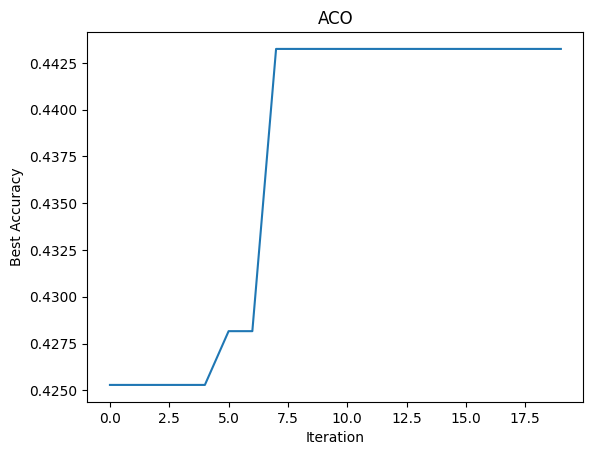

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

def compute_heuristic_values(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain)

def initialize_pheromone_matrix(num_features, tau0):
    return np.ones((num_features,), dtype=float) * tau0

def update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho):
    delta_tau = np.dot(ant_features.T, ant_accuracies) / num_valid
    return (1 - rho) * tau + delta_tau

def select_features(probabilities, remaining_features, q0):
    if np.random.rand() < q0:
        return np.argmax(probabilities)
    else:
        selected_feature = np.random.choice(remaining_features, p=probabilities)
        return selected_feature

def aco_feature_selection(xtrain, ytrain, xvalid, yvalid, opts, heuristic_values):
    num_ants = opts['num_ants']
    max_iter = opts['max_iter']
    alpha = opts['alpha']
    beta = opts['beta']
    rho = opts['rho']
    q0 = opts['q0']
    tau0 = opts['tau0']

    num_features = xtrain.shape[1]
    num_valid = len(yvalid)
    tau = initialize_pheromone_matrix(num_features, tau0)
    best_features = np.zeros((num_features,), dtype=int)
    best_accuracy = 0.0
    history = np.zeros((max_iter,), dtype=float)

    for iteration in range(max_iter):
        ant_accuracies = []
        ant_features = np.zeros((num_ants, num_features), dtype=int)

        for ant in range(num_ants):
            ant_solution = np.zeros((num_features,), dtype=int)
            remaining_features = np.arange(num_features)

            for _ in range(num_features):
                probabilities = (tau[remaining_features] * alpha) * (heuristic_values[remaining_features] * beta)
                probabilities /= np.sum(probabilities)
                selected_feature = select_features(probabilities, remaining_features, q0)
                ant_solution[selected_feature] = 1
                remaining_features = np.delete(remaining_features, np.where(remaining_features == selected_feature))

            selected_indices = np.where(ant_solution == 1)[0]
            x_train_subset = xtrain[:, selected_indices]
            x_valid_subset = xvalid[:, selected_indices]
            mdl = GaussianNB()  # Use Naive Bayes for classification
            mdl.fit(x_train_subset, ytrain)
            y_pred = mdl.predict(x_valid_subset)
            accuracy = np.sum(y_pred == yvalid) / num_valid
            ant_accuracies.append(accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = ant_solution

        tau = update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho)
        history[iteration] = best_accuracy
        print(f"Iteration {iteration + 1}/{max_iter}: Best Accuracy = {best_accuracy}")

    return best_features, history

# Load data
# Assuming dataset is already loaded into 'dataset' variable
data = dataset.values
feat = data[:, :-1]
label = data[:, -1]

# Find classes with only one member
unique_classes, class_counts = np.unique(label, return_counts=True)
classes_with_one_member = unique_classes[class_counts == 1]

# Remove samples from classes with only one member
for class_label in classes_with_one_member:
    label_indices = np.where(label == class_label)[0]
    feat = np.delete(feat, label_indices, axis=0)
    label = np.delete(label, label_indices)

# Split data into train and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.2, stratify=label)

# Compute heuristic values
heuristic_values = compute_heuristic_values(xtrain, ytrain)

# Parameters
opts = {
    'num_ants': 10,
    'max_iter': 20,
    'alpha': 1.0,
    'beta': 2.0,
    'rho': 0.5,
    'q0': 0.9,
    'tau0': 0.1
}

# Perform feature selection using ACO with Naive Bayes classifier
selected_features, history = aco_feature_selection(xtrain, ytrain, xtest, ytest, opts, heuristic_values)

# Select features based on ACO results
selected_indices = np.where(selected_features == 1)[0]
x_train_selected = xtrain[:, selected_indices]
x_test_selected = xtest[:, selected_indices]

# Train Naive Bayes model with selected features
mdl = GaussianNB()
mdl.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred = mdl.predict(x_test_selected)
accuracy = np.sum(y_pred == ytest) / len(ytest)
unique_labels = np.unique(label).astype(str)
report = classification_report(ytest, y_pred, target_names=unique_labels)
print("Accuracy after ACO feature selection with Naive Bayes classifier:", accuracy)
print("Classification Report:\n", report)

# Plot convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy')
plt.title('ACO')
plt.show()

### ACO + Decision Tree for Feature Selection

In [ ]:
import numpy as np #decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def compute_heuristic_values(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain)

def initialize_pheromone_matrix(num_features, tau0):
    return np.ones((num_features,), dtype=float) * tau0

def update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho):
    delta_tau = np.dot(ant_features.T, ant_accuracies) / num_valid
    return (1 - rho) * tau + delta_tau

def select_features(probabilities, remaining_features, q0):
    if np.random.rand() < q0:
        return np.argmax(probabilities)
    else:
        selected_feature = np.random.choice(remaining_features, p=probabilities)
        return selected_feature

def aco_feature_selection(xtrain, ytrain, xvalid, yvalid, opts, heuristic_values):
    num_ants = opts['num_ants']
    max_iter = opts['max_iter']
    alpha = opts['alpha']
    beta = opts['beta']
    rho = opts['rho']
    q0 = opts['q0']
    tau0 = opts['tau0']

    num_features = xtrain.shape[1]
    num_valid = len(yvalid)
    tau = initialize_pheromone_matrix(num_features, tau0)
    best_features = np.zeros((num_features,), dtype=int)
    best_accuracy = 0.0
    history = np.zeros((max_iter,), dtype=float)

    for iteration in range(max_iter):
        ant_accuracies = []
        ant_features = np.zeros((num_ants, num_features), dtype=int)

        for ant in range(num_ants):
            ant_solution = np.zeros((num_features,), dtype=int)
            remaining_features = np.arange(num_features)

            for _ in range(num_features):
                probabilities = (tau[remaining_features] * alpha) * (heuristic_values[remaining_features] * beta)
                probabilities /= np.sum(probabilities)
                selected_feature = select_features(probabilities, remaining_features, q0)
                ant_solution[selected_feature] = 1
                remaining_features = np.delete(remaining_features, np.where(remaining_features == selected_feature))

            selected_indices = np.where(ant_solution == 1)[0]
            x_train_subset = xtrain[:, selected_indices]
            x_valid_subset = xvalid[:, selected_indices]
            mdl = DecisionTreeClassifier()  # Use Decision Tree for classification
            mdl.fit(x_train_subset, ytrain)
            y_pred = mdl.predict(x_valid_subset)
            accuracy = np.sum(y_pred == yvalid) / num_valid
            ant_accuracies.append(accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = ant_solution

        tau = update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho)
        history[iteration] = best_accuracy
        print(f"Iteration {iteration + 1}/{max_iter}: Best Accuracy = {best_accuracy}")

    return best_features, history

# Load data
data = dataset.values
feat = data[:, :-1]
label = data[:, -1]

# Find classes with only one member
unique_classes, class_counts = np.unique(label, return_counts=True)
classes_with_one_member = unique_classes[class_counts == 1]

# Remove samples from classes with only one member
for class_label in classes_with_one_member:
    label_indices = np.where(label == class_label)[0]
    feat = np.delete(feat, label_indices, axis=0)
    label = np.delete(label, label_indices)

# Split data into train and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.2, stratify=label)

# Compute heuristic values
heuristic_values = compute_heuristic_values(xtrain, ytrain)

# Parameters
opts = {
    'num_ants': 10,
    'max_iter': 20,
    'alpha': 1.0,
    'beta': 2.0,
    'rho': 0.5,
    'q0': 0.9,
    'tau0': 0.1
}

# Perform feature selection using ACO with Decision Tree classifier
selected_features, history = aco_feature_selection(xtrain, ytrain, xtest, ytest, opts, heuristic_values)

# Perform Recursive Feature Elimination (RFE) with Decision Tree classifier for final feature selection
dt = DecisionTreeClassifier()
rfe = RFE(estimator=dt, n_features_to_select=np.sum(selected_features), step=1)
x_train_selected = rfe.fit_transform(xtrain, ytrain)
x_test_selected = rfe.transform(xtest)

# Train Decision Tree model with selected features
mdl = DecisionTreeClassifier()
mdl.fit(x_train_selected, ytrain)

# Evaluate accuracy, precision, recall, and F1 score
y_pred = mdl.predict(x_test_selected)
accuracy = np.sum(y_pred == ytest) / len(ytest)
unique_labels = np.unique(label).astype(str)
report = classification_report(ytest, y_pred, target_names=unique_labels)
print("Accuracy after ACO feature selection with Decision Tree classifier:", accuracy)
print("Classification Report:\n", report)

# Plot convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy')
plt.title('ACO')
plt.show()

Iteration 1/20: Best Accuracy = 0.8125
Iteration 2/20: Best Accuracy = 0.8139367816091954
Iteration 3/20: Best Accuracy = 0.8139367816091954
Iteration 4/20: Best Accuracy = 0.8139367816091954


KeyboardInterrupt: 

### ACO + Random Forest for Feature Selection

In [ ]:
#rf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def compute_heuristic_values(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain)

def initialize_pheromone_matrix(num_features, tau0):
    return np.ones((num_features,), dtype=float) * tau0

def update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho):
    delta_tau = np.dot(ant_features.T, ant_accuracies) / num_valid
    return (1 - rho) * tau + delta_tau

def select_features(probabilities, remaining_features, q0):
    if np.random.rand() < q0:
        return np.argmax(probabilities)
    else:
        selected_feature = np.random.choice(remaining_features, p=probabilities)
        return selected_feature

def aco_feature_selection(xtrain, ytrain, xvalid, yvalid, opts, heuristic_values):
    num_ants = opts['num_ants']
    max_iter = opts['max_iter']
    alpha = opts['alpha']
    beta = opts['beta']
    rho = opts['rho']
    q0 = opts['q0']
    tau0 = opts['tau0']

    num_features = xtrain.shape[1]
    num_valid = len(yvalid)
    tau = initialize_pheromone_matrix(num_features, tau0)
    best_features = np.zeros((num_features,), dtype=int)
    best_accuracy = 0.0
    history = np.zeros((max_iter,), dtype=float)

    for iteration in range(max_iter):
        ant_accuracies = []
        ant_features = np.zeros((num_ants, num_features), dtype=int)

        for ant in range(num_ants):
            ant_solution = np.zeros((num_features,), dtype=int)
            remaining_features = np.arange(num_features)

            for _ in range(num_features):
                probabilities = (tau[remaining_features] * alpha) * (heuristic_values[remaining_features] * beta)
                probabilities /= np.sum(probabilities)
                selected_feature = select_features(probabilities, remaining_features, q0)
                ant_solution[selected_feature] = 1
                remaining_features = np.delete(remaining_features, np.where(remaining_features == selected_feature))

            selected_indices = np.where(ant_solution == 1)[0]
            x_train_subset = xtrain[:, selected_indices]
            x_valid_subset = xvalid[:, selected_indices]
            mdl = RandomForestClassifier(n_estimators=100, random_state=42)  # Use Random Forest for classification
            mdl.fit(x_train_subset, ytrain)
            y_pred = mdl.predict(x_valid_subset)
            accuracy = np.sum(y_pred == yvalid) / num_valid
            ant_accuracies.append(accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = ant_solution

        tau = update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho)
        history[iteration] = best_accuracy
        print(f"Iteration {iteration + 1}/{max_iter}: Best Accuracy = {best_accuracy}")

    return best_features, history

# Load data
data = dataset.values
feat = data[:, :-1]
label = data[:, -1]

# Find classes with only one member
unique_classes, class_counts = np.unique(label, return_counts=True)
classes_with_one_member = unique_classes[class_counts == 1]

# Remove samples from classes with only one member
for class_label in classes_with_one_member:
    label_indices = np.where(label == class_label)[0]
    feat = np.delete(feat, label_indices, axis=0)
    label = np.delete(label, label_indices)

# Split data into train and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.2, stratify=label)

# Compute heuristic values
heuristic_values = compute_heuristic_values(xtrain, ytrain)

# Parameters
opts = {
    'num_ants': 10,
    'max_iter': 20,
    'alpha': 1.0,
    'beta': 2.0,
    'rho': 0.5,
    'q0': 0.9,
    'tau0': 0.1
}

# Perform feature selection using ACO with Random Forest classifier
selected_features, history = aco_feature_selection(xtrain, ytrain, xtest, ytest, opts, heuristic_values)

# Perform Recursive Feature Elimination (RFE) with Random Forest classifier for final feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=np.sum(selected_features), step=1)
x_train_selected = rfe.fit_transform(xtrain, ytrain)
x_test_selected = rfe.transform(xtest)

# Train Random Forest model with selected features
mdl = RandomForestClassifier(n_estimators=100, random_state=42)
mdl.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred = mdl.predict(x_test_selected)
accuracy = np.sum(y_pred == ytest) / len(ytest)
unique_labels = np.unique(label).astype(str)
report = classification_report(ytest, y_pred, target_names=unique_labels)
print("Accuracy after ACO feature selection with Random Forest classifier:", accuracy)
print("Classification Report:\n", report)

# Plot convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy')
plt.title('ACO')
plt.show()

### ACO + SVM for Feature Selection

Iteration 1/10: Best Accuracy = 0.832
Iteration 2/10: Best Accuracy = 0.832
Iteration 3/10: Best Accuracy = 0.832
Iteration 4/10: Best Accuracy = 0.832
Iteration 5/10: Best Accuracy = 0.832
Iteration 6/10: Best Accuracy = 0.832
Iteration 7/10: Best Accuracy = 0.832
Iteration 8/10: Best Accuracy = 0.832
Iteration 9/10: Best Accuracy = 0.832
Iteration 10/10: Best Accuracy = 0.832
Accuracy after ACO and RFE feature selection with SVM classifier: 0.8306666666666667
Classification Report after ACO and RFE:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        24
         6.0       0.83      1.00      0.91       624
         9.0       0.00      0.00      0.00        48
        12.0       0.00      0.00      0.00        23
        15.0       0.00      0.00      0.00        31

    accuracy                           0.83       750
   macro avg       0.17      0.20      0.18       750
weighted avg       0.69      0.83      0.76       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


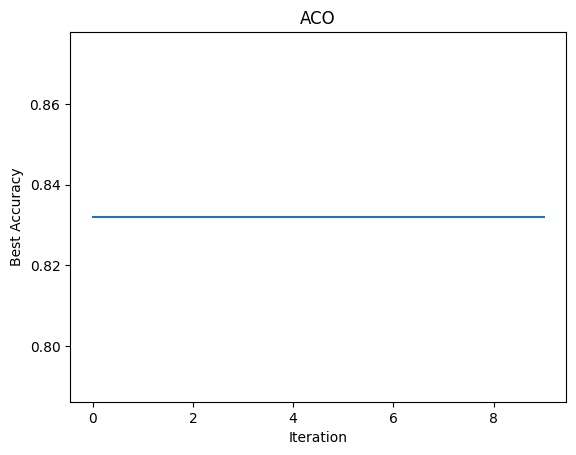

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def compute_heuristic_values(xtrain, ytrain):
    return mutual_info_classif(xtrain, ytrain)

def initialize_pheromone_matrix(num_features, tau0):
    return np.ones((num_features,), dtype=float) * tau0

def update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho):
    delta_tau = np.dot(ant_features.T, ant_accuracies) / num_valid
    return (1 - rho) * tau + delta_tau

def select_features(probabilities, remaining_features, q0):
    if np.random.rand() < q0:
        return np.argmax(probabilities)
    else:
        selected_feature = np.random.choice(remaining_features, p=probabilities)
        return selected_feature

def aco_feature_selection(xtrain, ytrain, xvalid, yvalid, opts, heuristic_values):
    num_ants = opts['num_ants']
    max_iter = opts['max_iter']
    alpha = opts['alpha']
    beta = opts['beta']
    rho = opts['rho']
    q0 = opts['q0']
    tau0 = opts['tau0']

    num_features = xtrain.shape[1]
    num_valid = len(yvalid)
    tau = initialize_pheromone_matrix(num_features, tau0)
    best_features = np.zeros((num_features,), dtype=int)
    best_accuracy = 0.0
    history = np.zeros((max_iter,), dtype=float)

    for iteration in range(max_iter):
        ant_accuracies = []
        ant_features = np.zeros((num_ants, num_features), dtype=int)

        for ant in range(num_ants):
            ant_solution = np.zeros((num_features,), dtype=int)
            remaining_features = np.arange(num_features)

            for _ in range(num_features):
                probabilities = (tau[remaining_features] ** alpha) * (heuristic_values[remaining_features] ** beta)
                probabilities /= np.sum(probabilities)
                selected_feature = select_features(probabilities, remaining_features, q0)
                ant_solution[selected_feature] = 1
                remaining_features = np.delete(remaining_features, np.where(remaining_features == selected_feature))

            selected_indices = np.where(ant_solution == 1)[0]
            x_train_subset = xtrain[:, selected_indices]
            x_valid_subset = xvalid[:, selected_indices]
            mdl = SVC(kernel='linear')  # Use SVM for classification
            mdl.fit(x_train_subset, ytrain)
            y_pred = mdl.predict(x_valid_subset)
            accuracy = np.sum(y_pred == yvalid) / num_valid
            ant_accuracies.append(accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = ant_solution

        tau = update_pheromone(tau, ant_features, ant_accuracies, num_valid, rho)
        history[iteration] = best_accuracy
        print(f"Iteration {iteration + 1}/{max_iter}: Best Accuracy = {best_accuracy}")

    return best_features, history

# Load data
# Assuming dataset is already loaded into 'dataset' variable
data = dataset.values
feat = data[:, :-1]
label = data[:, -1]

# Find classes with only one member
unique_classes, class_counts = np.unique(label, return_counts=True)
classes_with_one_member = unique_classes[class_counts == 1]

# Remove samples from classes with only one member
for class_label in classes_with_one_member:
    label_indices = np.where(label == class_label)[0]
    feat = np.delete(feat, label_indices, axis=0)
    label = np.delete(label, label_indices)

# Split data into train and validation sets
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.5, stratify=label)

# Compute heuristic values
heuristic_values = compute_heuristic_values(xtrain, ytrain)

# Parameters
opts = {
    'num_ants': 100,
    'max_iter': 10,
    'alpha': 1.0,
    'beta': 2.0,
    'rho': 0.5,
    'q0': 0.9,
    'tau0': 0.1
}

# Perform feature selection using ACO with SVM classifier
selected_features, history = aco_feature_selection(xtrain, ytrain, xtest, ytest, opts, heuristic_values)

# Perform Recursive Feature Elimination (RFE) with SVM classifier for final feature selection
svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=np.sum(selected_features), step=1)
x_train_selected = rfe.fit_transform(xtrain, ytrain)
x_test_selected = rfe.transform(xtest)

# Train SVM model with selected features
svc.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred = svc.predict(x_test_selected)
accuracy = np.sum(y_pred == ytest) / len(ytest)

# Generate classification report
unique_labels = np.unique(label).astype(str)
report = classification_report(ytest, y_pred, target_names=unique_labels)
print("Accuracy after ACO and RFE feature selection with SVM classifier:", accuracy)
print("Classification Report after ACO and RFE:\n", report)

# Plot convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Accuracy')
plt.title('ACO')
plt.show()


### Print Selected Features

In [ ]:
# Evaluate selected features
selected_indices = np.where(selected_features == 1)[0]
selected_feature_names = dataset.columns[selected_indices]
print("Selected Features:", selected_feature_names)

print(selected_features)
print(len(selected_features))

### Download Selected Features as CSV

In [ ]:
# Assuming you have already loaded the data and performed the ACO feature selection.

# Get the total number of columns in the DataFrame
total_columns = dataset.shape[1] - 1  # Excluding the 'Risk' column

# Validate the selected feature indices to ensure they are within bounds
selected_indices = selected_features[selected_features == 1].nonzero()[0]

# Filter out indices that are out-of-bounds
valid_indices = selected_indices[selected_indices < total_columns]

# Check if any indices are still out-of-bounds
if len(valid_indices) < len(selected_indices):
    print(f"Warning: {len(selected_indices) - len(valid_indices)} selected indices were out-of-bounds and excluded.")

# Create a DataFrame containing only the selected features from the original DataFrame
selected_features_df = dataset.iloc[:, valid_indices]

# Show the first few rows of the DataFrame containing only the selected features
print("\nDataFrame containing only the selected features:")
print(selected_features_df.head())

# Save the DataFrame containing only the selected features to a CSV file
selected_features_df.to_csv('selected_features.csv', index=False)

# Print a message indicating the file has been saved
print("CSV file created: selected_features.csv")

## Classification after ACO Feature Selection

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred_knn = knn_classifier.predict(x_test_selected)
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(ytest, y_pred_knn)
print("Classification Report for KNN classifier:\n", classification_rep)



### Random Forest Classifier  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred_rf = rf_classifier.predict(x_test_selected)

# Generate classification report
classification_rep = classification_report(ytest, y_pred_rf)
print("Classification Report for Random Forest classifier:\n", classification_rep)


Classification Report for Random Forest classifier:
               precision    recall  f1-score   support

         3.0       0.50      0.04      0.08        24
         6.0       0.83      0.99      0.90       624
         9.0       0.00      0.00      0.00        48
        12.0       0.00      0.00      0.00        23
        15.0       0.00      0.00      0.00        31

    accuracy                           0.82       750
   macro avg       0.27      0.21      0.20       750
weighted avg       0.71      0.82      0.75       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred_dt = dt_classifier.predict(x_test_selected)
from sklearn.metrics import classification_report

# Generate classification report
classification_rep_dt = classification_report(ytest, y_pred_dt)
print("Classification Report for Decision Tree classifier:\n", classification_rep_dt)



### SVM Classifier

In [ ]:
# Train SVM model with selected features
mdl = SVC(kernel='linear')
mdl.fit(x_train_selected, ytrain)

# Evaluate accuracy
y_pred = mdl.predict(x_test_selected)
from sklearn.metrics import classification_report

# Generate classification report
classification_rep_dt = classification_report(ytest, y_pred_dt)
print("Classification Report for SVM classifier:\n", classification_rep_dt)


## Assigning Risk Classes to Bugs

In [ ]:
dataset = dataset.head(1500)
dataset.shape


(645, 1187)

In [ ]:
# Get the unique values in the 'Risk' column
unique_risks = dataset['Risk'].unique()

# Print the unique values
print(unique_risks)

[ 6.  9. 12.  3. 15.  4.  8. 10.]


In [ ]:
# Count the occurrences of each unique risk value
bugs_count_by_risk = dataset['Risk'].value_counts()

# Print the count of bugs for each risk
for risk, bugs_count in bugs_count_by_risk.items():
    print("Risk {}: {} bugs".format(risk, bugs_count))

Risk 6.0: 1249 bugs
Risk 9.0: 97 bugs
Risk 15.0: 62 bugs
Risk 3.0: 47 bugs
Risk 12.0: 45 bugs


In [ ]:
# Define how many times to duplicate rows with risk value 4
num_duplicates = 6

# Loop through the DataFrame and duplicate rows with risk value 4
for index, row in dataset.iterrows():
    if row['Risk'] == 10.0:
        duplicated_rows = pd.DataFrame([row] * num_duplicates)
        dataset = pd.concat([dataset, duplicated_rows], ignore_index=True)

In [ ]:
# Count the occurrences of each unique risk value
bugs_count_by_risk = dataset['Risk'].value_counts()

# Print the count of bugs for each risk
for risk, bugs_count in bugs_count_by_risk.items():
    print("Risk {}: {} bugs".format(risk, bugs_count))


Risk 6.0: 1249 bugs
Risk 9.0: 97 bugs
Risk 15.0: 62 bugs
Risk 3.0: 47 bugs
Risk 12.0: 45 bugs


In [ ]:
dataset.shape


(1182, 1187)


Predicted Risk Values and Their Classes for Each Bug:
Bug 1: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 2: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 3: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 4: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 5: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 6: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 7: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 8: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 9: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 10: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 11: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 12: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 13: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 14: Predicted Risk Value: 6.0, Predicted Class: Medium Risk
Bug 15: Predicted Risk Value: 6.0, Predicted Class: Medium

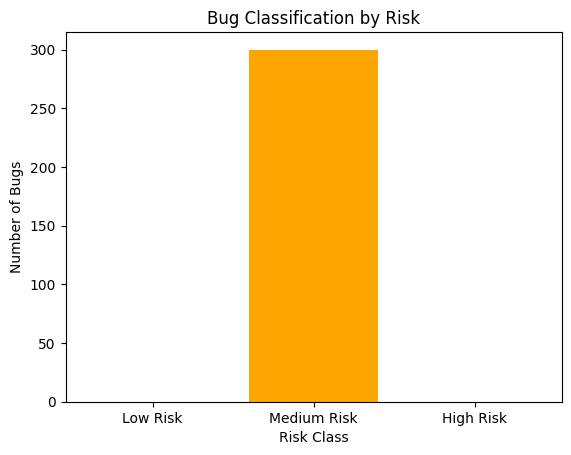

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume your dataset is stored in variables X and y

# Split the dataset into features (X) and the target variable (y)
X = dataset.drop(columns=['Risk'])  # Assuming 'Risk' is the target variable
y = dataset['Risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the thresholds for each risk category
thresholds = {
    'low': 6,
    'medium': 6,
    'high': np.inf  # Infinite upper bound for high risk
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest model with selected features
rf_classifier.fit(X_train, y_train)

# Predict the bugs based on the Random Forest model
predictions = rf_classifier.predict(X_test)

# Classify bugs based on the thresholds and Random Forest predictions
def classify_bugs(predictions):
    classified_bugs = []
    for prediction in predictions:
        if prediction < thresholds['low']:
            classified_bugs.append(('Low Risk', prediction))
        elif prediction == thresholds['medium']:
            classified_bugs.append(('Medium Risk', prediction))
        else:
            classified_bugs.append(('High Risk', prediction))
    return classified_bugs

# Classify the bugs
classified_bugs = classify_bugs(predictions)

# Print the predicted risk values and their corresponding risk classes for each bug
print("\nPredicted Risk Values and Their Classes for Each Bug:")
for i, (label, prediction) in enumerate(classified_bugs, 1):
    print(f"Bug {i}: Predicted Risk Value: {prediction}, Predicted Class: {label}")

# Visualize the count of bugs in each class
categories = ['Low Risk', 'Medium Risk', 'High Risk']
counts = [sum(1 for label, _ in classified_bugs if label == 'Low Risk'),
          sum(1 for label, _ in classified_bugs if label == 'Medium Risk'),
          sum(1 for label, _ in classified_bugs if label == 'High Risk')]

plt.bar(categories, counts, color=['green', 'orange', 'red'])
plt.xlabel('Risk Class')
plt.ylabel('Number of Bugs')
plt.title('Bug Classification by Risk')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Fit K-means clustering to the predicted risk values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(np.array(risk_values).reshape(-1, 1))

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize the scatter plot with different markers for each cluster
plt.figure(figsize=(8, 6))
for i, label in enumerate(risk_classes):
    cluster_index = kmeans.labels_[i]
    plt.scatter(i, risk_values[i], color=colors[label], marker=f'${cluster_index}$', label=label)
plt.scatter(cluster_centers, kmeans.predict(cluster_centers), color='black', marker='x', label='Cluster Center')
plt.xlabel('Bug Index')
plt.ylabel('Predicted Risk Value')
plt.title('Clustering of Predicted Risk Values')
plt.legend()
plt.show()


NameError: name 'risk_values' is not defined

In [ ]:
import numpy as np
from sklearn.svm import SVC

# Define the regions for each threshold
regions = {
    'low': (None, 5.777126099706736),
    'medium': (5.777126099706736, 9.40798442064265),
    'high': (9.40798442064265, 15.384615384615385),
    'severe': (15.384615384615385, None)
}

# Define the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM model with selected features
svm_classifier.fit(x_train_selected, ytrain)

# Classify bugs based on the thresholds and SVM predictions
def classify_bugs(predictions):
    classified_bugs = []
    for prediction in predictions:
        if prediction <= regions['low'][1]:
            classified_bugs.append('Low')
        elif prediction <= regions['medium'][1]:
            classified_bugs.append('Medium')
        elif prediction <= regions['high'][1]:
            classified_bugs.append('High')
        else:
            classified_bugs.append('Severe')
    return classified_bugs

# Predict the bugs based on the SVM mode
predictions = svm_classifier.predict(x_test_selected)

# Classify the bugs
classified_bugs = classify_bugs(predictions)

# Print the classified bugs
for i, bug_class in enumerate(classified_bugs):
    print(f"Bug {i+1}: {bug_class}")